In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = "datasets/jaipur_processed.csv"
data = pd.read_csv(dataset)
df_comp=pd.DataFrame(data)
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,19.0,20,31,75,9,629.0,11.5787,8.10509
1,2016-01-01 01:00:00,19.0,20,33,75,8,629.0,9.0648,6.34536
2,2016-01-01 02:00:00,19.0,20,35,76,7,629.0,8.5787,6.00509
3,2016-01-01 03:00:00,19.0,19,37,76,6,629.0,11.5398,8.07786
4,2016-01-01 04:00:00,19.0,20,37,82,6,629.0,11.7022,8.19154


In [3]:
df_comp['EnergyGenerated']=df_comp.EnergyGenerated
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,19.0,20,31,75,9,629.0,11.5787,8.10509
1,2016-01-01 01:00:00,19.0,20,33,75,8,629.0,9.0648,6.34536
2,2016-01-01 02:00:00,19.0,20,35,76,7,629.0,8.5787,6.00509
3,2016-01-01 03:00:00,19.0,19,37,76,6,629.0,11.5398,8.07786
4,2016-01-01 04:00:00,19.0,20,37,82,6,629.0,11.7022,8.19154


In [4]:
df_comp['date_time'] = pd.to_datetime(df_comp['date_time'])
df_comp2 = df_comp.groupby(df_comp['date_time'].dt.date).agg({ 'EnergyGenerated': 'sum'}).reset_index()
df_comp2.describe()

,EnergyGenerated
count,1462.000000
mean,398.273297
std,281.694566
min,9.161320
25%,207.379865
50%,318.342850
75%,503.758168
max,1983.816660


C:\Users\Sri Harsh\AppData\Local\Temp\ipykernel_15644\1877663863.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[threshold1 <= z_scores]


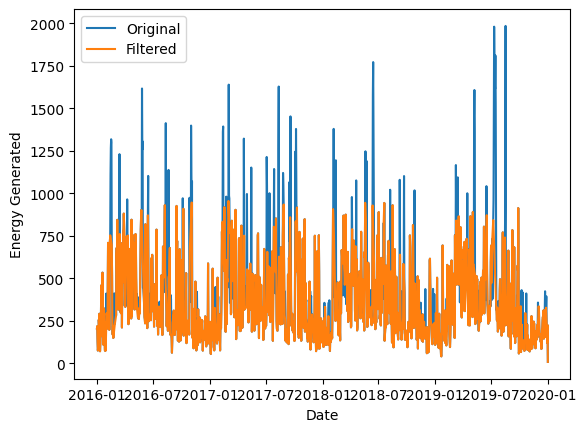

In [5]:
import matplotlib.pyplot as plt

plt.plot(df_comp2['date_time'], df_comp2['EnergyGenerated'], label='Original')

z_scores = np.abs((df_comp2['EnergyGenerated'] - df_comp2['EnergyGenerated'].mean()) / df_comp2['EnergyGenerated'].std())
threshold1 = 0.2
threshold2 = 2
df_filtered = df_comp2[z_scores <= threshold2]
df_filtered = df_filtered[threshold1 <= z_scores]

df_filtered['EnergyGenerated'] = df_filtered['EnergyGenerated'].fillna((df_filtered['EnergyGenerated'].shift(1) + df_filtered['EnergyGenerated'].shift(-1) + df_filtered['EnergyGenerated'].shift(-2) + df_filtered['EnergyGenerated'].shift(2)) / 4)


plt.plot(df_filtered['date_time'], df_filtered['EnergyGenerated'], label='Filtered')

plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.legend()


plt.show()


In [6]:
df_filtered['Temperature'] = df_comp['Temperature']
df_filtered['pressure'] = df_comp['Pressure']
df_filtered['humidity'] = df_comp['Humidity']
df_filtered['WindDirection(Degrees)'] = df_comp['WindDirection(Degrees)']
df_filtered['Speed'] = df_comp['Speed']
df_filtered['SunLightDuration'] = df_comp['SunLightDuration']
df_filtered['SolarRadiation'] = df_comp['SolarRadiation']

In [7]:
df_filtered.describe()

,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation
count,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000
mean,345.843193,19.158212,16.484953,37.413586,152.432502,8.527085,657.489252,21.330606
std,216.849555,2.895912,2.394861,15.657095,104.126551,3.861846,20.856089,26.856553
min,9.161320,13.500000,8.000000,6.000000,4.000000,1.000000,629.000000,1.232400
25%,185.224620,16.500000,15.000000,26.000000,67.000000,6.000000,639.000000,3.273350
50%,265.588890,19.000000,17.000000,35.000000,125.000000,8.000000,654.000000,11.968900
75%,505.075690,21.500000,18.000000,47.000000,239.500000,11.000000,674.000000,24.989350
max,955.231970,26.500000,22.000000,87.000000,357.000000,21.000000,698.000000,137.741300


In [8]:
df_filtered.isnull().sum()

date_time                 0
EnergyGenerated           0
Temperature               0
pressure                  0
humidity                  0
WindDirection(Degrees)    0
Speed                     0
SunLightDuration          0
SolarRadiation            0
dtype: int64

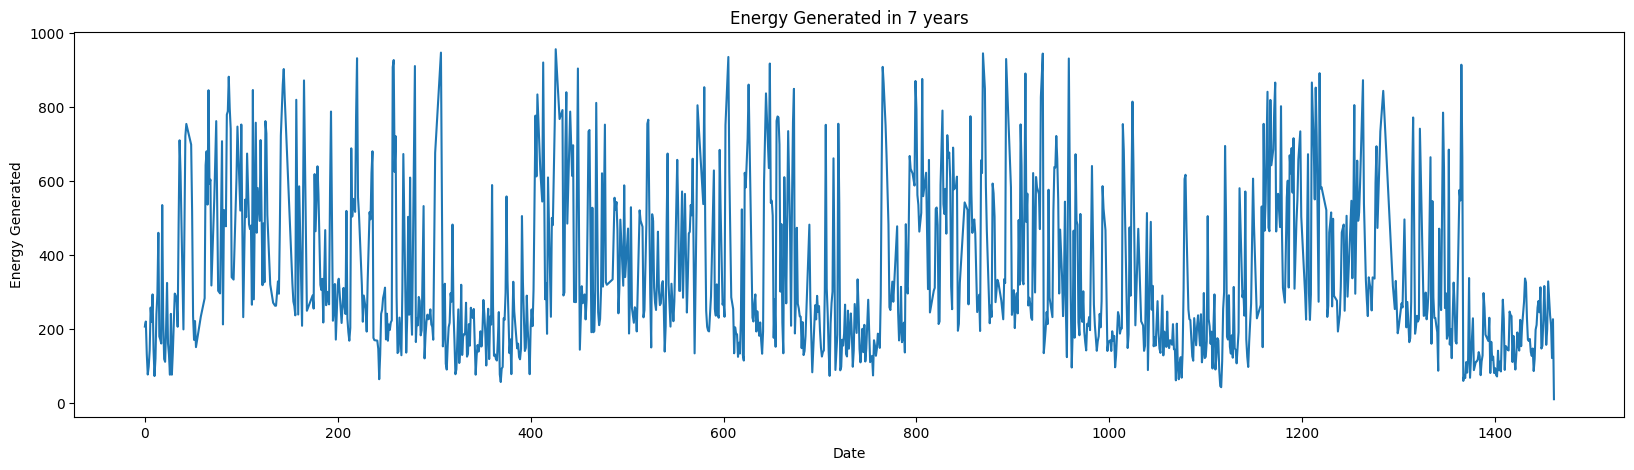

In [9]:
# Set the 'date' column as the index
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])


fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_filtered['EnergyGenerated'].index, df_filtered['EnergyGenerated'])

ax.set_xlabel('Date')
ax.set_ylabel('Energy Generated')
ax.set_title('Energy Generated in 7 years')
plt.show()

In [10]:
import pandas as pd

# Extract month and day of the year from the 'datetime' column
df_filtered['month'] = df_filtered['date_time'].dt.month
df_filtered['day_of_year'] = df_filtered['date_time'].dt.dayofyear

summer_condition = ((df_filtered['month'] >= 6) & (df_filtered['month'] <= 8))
winter_condition = ((df_filtered['month'] >= 12) | (df_filtered['month'] <= 2))
rainy_condition = ((df_filtered['month'] >= 3) & (df_filtered['month'] <= 5))

# Create the 'isSummer', 'isWinter', and 'isRainy' columns
df_filtered['isSummer'] = summer_condition.astype(int)
df_filtered['isWinter'] = winter_condition.astype(int)
df_filtered['isRainy'] = rainy_condition.astype(int)


In [11]:
size = int(len(df_filtered)*0.8)
df_train, df_test = df_filtered.iloc[:size], df_filtered.iloc[size:]
df_test.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
1167,2019-03-13,818.20739,24.5,14,30,113,12,679.0,35.3601,3,72,0,0,1
1168,2019-03-14,641.62819,24.5,15,33,99,13,679.0,13.4399,3,73,0,0,1
1170,2019-03-16,684.42122,24.5,16,37,73,15,679.0,29.6920,3,75,0,0,1
1171,2019-03-17,793.18176,24.5,16,39,72,15,679.0,28.3499,3,76,0,0,1
1172,2019-03-18,865.03851,24.5,16,40,71,15,679.0,29.2636,3,77,0,0,1


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_filtered['EnergyGenerated'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.875221437824563
p-value: 0.0022249634866270173
Critical Values: {'1%': -3.4360740356772745, '5%': -2.864067535683479, '10%': -2.5681157233843748}


In [14]:
df_filtered.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
0,2016-01-01,205.56732,19.0,20,31,75,9,629.0,11.5787,1,1,0,1,0
1,2016-01-02,219.20136,19.0,20,33,75,8,629.0,9.0648,1,2,0,1,0
2,2016-01-03,130.38284,19.0,20,35,76,7,629.0,8.5787,1,3,0,1,0
3,2016-01-04,75.95273,19.0,19,37,76,6,629.0,11.5398,1,4,0,1,0
4,2016-01-05,97.49313,19.0,20,37,82,6,629.0,11.7022,1,5,0,1,0


## Using ARIMA model

In [15]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df_filtered["EnergyGenerated"],trace=True,suppress_warnings=True)
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15370.626, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15721.630, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15600.872, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15487.779, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15719.631, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15368.805, Time=0.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15387.523, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15366.987, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15368.783, Time=0.73 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15548.859, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15364.991, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15485.779, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=15598.873, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=15366.788, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(df_train["EnergyGenerated"],order=(5,2,3))
model_Arima = model_Arima.fit()
model_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        EnergyGenerated   No. Observations:                  930
Model:                 ARIMA(5, 2, 3)   Log Likelihood               -6170.977
Date:                Thu, 29 Jun 2023   AIC                          12359.953
Time:                        13:32:50   BIC                          12403.450
Sample:                             0   HQIC                         12376.545
                                - 930                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6829      0.044    -15.606      0.000      -0.769      -0.597
ar.L2          0.3252      0.061      5.308      0.000       0.205       0.445
ar.L3         -0.0622      0.045     -1.384      0.166      -0.150       0.026
ar.L4         -0.1110      0.046     -2.427      0.015      -0.201      -0.021
ar.L5         -0.0301      0.032     -0.932      0.351      -0.093       0.033
ma.L1         -0.8365      0.103     -8.103      0.000      -1.039      -0.634
ma.L2         -0.9977      0.022    -44.653      0.000      -1.042      -0.954
ma.L3          0.8343      0.088      9.441      0.000       0.661       1.008
sigma2       2.96e+04   3733.519      7.927      0.000    2.23e+04    3.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                84.41
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.61
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start = len(df_train)
end =len(df_train)+len(df_test)-1
pred_arima = model_Arima.predict(start=start,end=end,type='levels')
pred_arima.index = df_filtered.index[start:end+1]
print(pred_arima)

1167    413.228313
1168    462.370474
1170    445.324630
1171    488.691997
1172    456.812406
           ...    
1457    537.849849
1458    543.208939
1459    538.516161
1460    543.789815
1461    539.181746
Name: predicted_mean, Length: 233, dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arima = sqrt(mean_squared_error(pred_arima,df_test["EnergyGenerated"]))/10
print(rmse_arima)


28.860297116966926



## Using Arima with Features

In [19]:
# Define the exogenous variables
exog_vars = ['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Arima2 = ARIMA(df_train['EnergyGenerated'], order=(5, 1, 2), exog=df_train[exog_vars])
model_fit = model_Arima2.fit()

pred_arima2 = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_arima2.index = df_filtered.index[start:end+1]

In [20]:
# Evaluate the forecast
rmse_arima2 = sqrt(mean_squared_error(pred_arima2,df_test["EnergyGenerated"]))/10

print("rmse_arima2:", rmse_arima2)
print("Forecasted energy generation:", pred_arima2)


rmse_arima2: 30.319749380260326
Forecasted energy generation: 1167    389.515702
1168    418.611511
1170    415.340559
1171    436.923970
1172    420.302445
           ...    
1457    -67.773714
1458    -58.879350
1459    -57.604396
1460    -52.871987
1461    -51.588248
Name: predicted_mean, Length: 233, dtype: float64


## Using AutoRegression Model

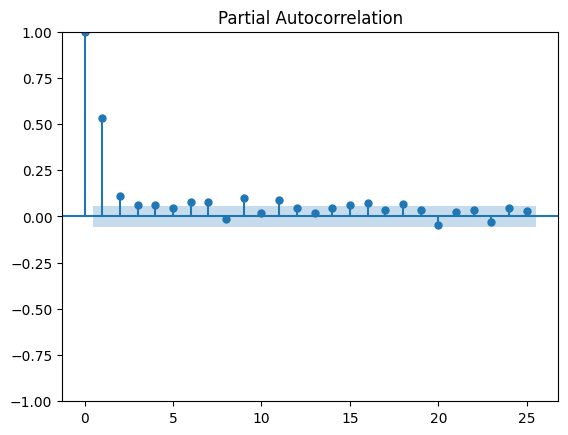

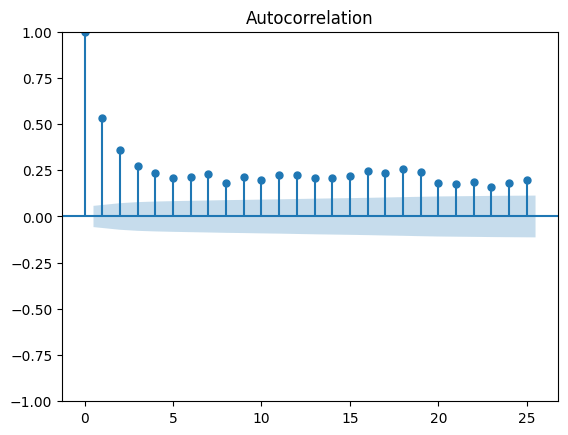

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(df_filtered['EnergyGenerated'],lags=25) 
acf = plot_acf(df_filtered['EnergyGenerated'],lags=25)

In [22]:
from statsmodels.tsa.ar_model import AutoReg
model_AutoReg = AutoReg(df_train['EnergyGenerated'],lags=7).fit()
print(model_AutoReg.summary())

                            AutoReg Model Results                             
Dep. Variable:        EnergyGenerated   No. Observations:                  930
Model:                     AutoReg(7)   Log Likelihood               -6122.331
Method:               Conditional MLE   S.D. of innovations            183.854
Date:                Thu, 29 Jun 2023   AIC                          12262.662
Time:                        13:32:54   BIC                          12306.110
Sample:                             7   HQIC                         12279.239
                                  930                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                117.9715     16.349      7.216      0.000      85.927     150.016
EnergyGenerated.L1     0.4549      0.033     13.851      0.000       0.391       0.519
EnergyGenerated.L2  

In [23]:
pred_autoreg = model_AutoReg.predict(start=start,end=end,dynamic = False)
pred_autoreg.index = df_filtered.index[start:end+1]
print(pred_autoreg)

1167    417.584480
1168    442.804321
1170    419.961030
1171    420.486819
1172    427.178138
           ...    
1457    352.667606
1458    352.667606
1459    352.667606
1460    352.667606
1461    352.667606
Length: 233, dtype: float64


In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_autoreg = sqrt(mean_squared_error(df_test['EnergyGenerated'],pred_autoreg))/10
print(rmse_autoreg)


21.273398588057894


## Using SARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the exogenous variables
exog_vars =['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Sarima = SARIMAX(df_train['EnergyGenerated'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12), exog=df_train[exog_vars])
model_fit = model_Sarima.fit()

In [26]:
# Forecast future energy generation
pred_sarima = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_sarima.index = df_filtered.index[start:end+1]

rmse_sarima = sqrt(mean_squared_error(pred_sarima,df_test["EnergyGenerated"]))/10


print("rmse_arima2:", rmse_sarima)

print("Forecasted energy generation:", pred_sarima)


rmse_arima2: 30.404056951359603
Forecasted energy generation: 1167    403.020173
1168    398.753654
1170    413.682363
1171    423.568752
1172    417.221423
           ...    
1457    -56.145079
1458    -49.848660
1459    -46.981067
1460    -39.379784
1461    -42.520813
Name: predicted_mean, Length: 233, dtype: float64


## Using Prophet Model

In [27]:

from prophet.plot import plot_plotly, plot_components_plotly
import prophet as pt


In [28]:
df_prophet = pd.DataFrame()
df_prophet ["ds"] = data["date_time"]
df_prophet["y"] = data["EnergyGenerated"]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

df_prophet = df_prophet.groupby(df_prophet['ds'].dt.date).agg({ 'y': 'sum'}).reset_index()

df_prophet.head()

,ds,y
0,2016-01-01,205.56732
1,2016-01-02,219.20136
2,2016-01-03,130.38284
3,2016-01-04,75.95273
4,2016-01-05,97.49313


In [29]:
# Filter out the outliers
z_scores = np.abs((df_prophet['y'] - df_prophet['y'].mean()) / df_prophet['y'].std())

threshold1 = 0.2
threshold2 = 2

df_prophet_filtered = df_prophet[z_scores <= threshold2]
df_prophet_filtered = df_prophet_filtered[threshold1 <= z_scores]


df_prophet_filtered['y'] = df_prophet_filtered['y'].fillna((df_prophet_filtered['y'].shift(1) + df_prophet_filtered['y'].shift(-1) + df_prophet_filtered['y'].shift(-2) + df_prophet_filtered['y'].shift(2)) / 4)


In [30]:
size = int(len(df_prophet_filtered)*0.8)

df_prophet_train = df_prophet_filtered.iloc[:size]
df_prophet_test = df_prophet_filtered.iloc[size:]

In [31]:
model_prophet = pt.Prophet()
model_prophet.fit(df_prophet_train)
future = model_prophet.make_future_dataframe(periods=415) 
forecast = model_prophet.predict(future) 

13:33:00 - cmdstanpy - INFO - Chain [1] start processing
13:33:00 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1340,2020-04-26,335.478415,215.817020,715.198574,334.835806,336.112167,120.783102,120.783102,120.783102,-10.773125,-10.773125,-10.773125,131.556227,131.556227,131.556227,0.0,0.0,0.0,456.261517
1341,2020-04-27,335.447559,223.008325,681.644457,334.802580,336.082948,120.376438,120.376438,120.376438,-7.642772,-7.642772,-7.642772,128.019210,128.019210,128.019210,0.0,0.0,0.0,455.823997
1342,2020-04-28,335.416702,185.537663,665.803875,334.767549,336.053724,106.296259,106.296259,106.296259,-17.461428,-17.461428,-17.461428,123.757687,123.757687,123.757687,0.0,0.0,0.0,441.712961
1343,2020-04-29,335.385846,178.455058,684.433261,334.732517,336.024511,115.329712,115.329712,115.329712,-3.568313,-3.568313,-3.568313,118.898025,118.898025,118.898025,0.0,0.0,0.0,450.715558
1344,2020-04-30,335.354989,223.761656,697.753396,334.697486,335.995328,132.159554,132.159554,132.159554,18.576135,18.576135,18.576135,113.583419,113.583419,113.583419,0.0,0.0,0.0,467.514543


In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1340,2020-04-26,456.261517,215.817020,715.198574
1341,2020-04-27,455.823997,223.008325,681.644457
1342,2020-04-28,441.712961,185.537663,665.803875
1343,2020-04-29,450.715558,178.455058,684.433261
1344,2020-04-30,467.514543,223.761656,697.753396


In [34]:
df_prophet_test.tail()

,ds,y
1457,2019-12-28,235.71947
1458,2019-12-29,208.83191
1459,2019-12-30,120.41652
1460,2019-12-31,225.45600
1461,2020-01-01,9.16132


In [35]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-233:]['yhat']

rmse_prophet = rmse(predictions,df_prophet_test['y'])/10

print(rmse_prophet)

28.020293198393908


In [36]:
print("Root Mean Square error for Auto Regression :",rmse_autoreg)
print("Root Mean Square error for ARIMA :",rmse_arima)
print("Root Mean Square error for SARIMA :",rmse_sarima)
print("Root Mean Square error for ARIMA with features :",rmse_arima2)
print("Root Mean Square error for Prophet :",rmse_prophet)

Root Mean Square error for Auto Regression : 21.273398588057894
Root Mean Square error for ARIMA : 28.860297116966926
Root Mean Square error for SARIMA : 30.404056951359603
Root Mean Square error for ARIMA with features : 30.319749380260326
Root Mean Square error for Prophet : 28.020293198393908
